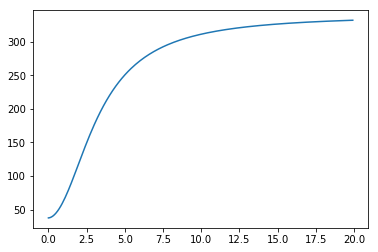

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from decimal import Decimal
from scipy.integrate import quad
from scipy.integrate import dblquad
import pandas as pd
def sigmazz(x,y,t):
    return ((((2*(30.0*t)**2 - 4*x**4 + 30.0*t*x**2*y)*2*30*t*y*x**2+((30*t)**2-4*x**4)**2* np.log(np.abs(2*x**2+30*t*y)))/(30*t)**3)*0.25/np.cosh((x-5)/2)**2)
def sigzz(y,t):
    return quad(sigmazz, -10, 20, args=(y,t))[0]
def XX(x,y,t):
    return 2*(1-y**2)*(x**4)*(30.0*t*y+2*x**2)*(1/((30.0*t*y+2*x**2)**2+(2*x*t)**2))*0.25/((np.cosh((x-5)/2)**2))
def sigmaxx(y,t):
    return quad(XX, -10.0, 20.0, args=(y,t))[0]
def sigxx(t):
    return quad(sigmaxx, -1.0, 1.0,args=(t))[0]
def XY(x,y,t):
    return 2*(1-y**2)*(2*t*x**5)*(1/((30.0*t*y+2*x**2)**2+(2*x*t)**2))*0.25/((np.cosh((x-5)/2)**2))
def sigmaxy(y,t):
    return quad(XY, -10.0, 20.0, args=(y,t))[0]
def sigxy(t):
    return quad(sigmaxy, -1.0,1.0,args=(t))[0]
vec_sigxx=np.vectorize(sigxx)
vec_sigxy=np.vectorize(sigxy)
vec_sigzz=np.vectorize(sigzz)
t=np.arange(0.01, 20.0, 0.1)
f=vec_sigxx(t)
g=vec_sigzz(1.00,t)-vec_sigzz(-1.00,t)
h=vec_sigxy(t)
Cond=np.column_stack((t,f,g,h))
df_sigma=pd.DataFrame(Cond)
df_sigma.to_csv('sigma.txt', sep='\t', index=False)
df_cond = pd.read_csv("sigma.txt", sep="\t")
df_cond.columns = ["t", "f_values","g_values","h_values"]
plt.plot(df_cond["t"],df_cond["g_values"])
plt.show()

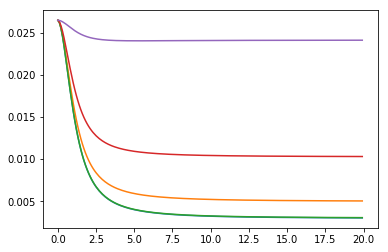

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.integrate import dblquad
import pandas as pd
df_cond = pd.read_csv("sigma.txt", sep="\t")
df_cond.columns = ["t", "f","g","h"]
z=[0,np.pi/10,np.pi/80,np.pi/5,np.pi/2]
# rc=(np.cos(z))
# rs=(np.sin(z))
for i in range(5):
    rc=(np.cos(z[i]))
    rs=(np.sin(z[i]))
    df_cond1=(rc**2*df_cond['f']+rs**2*df_cond['g'])*(df_cond['f']*(rc**2*df_cond['g']+rs**2*df_cond['f'])+rs**2*df_cond['h']**2)+rc**2*df_cond['h']**2*(rc**2*df_cond['g']+rs**2*df_cond['f']+rs**2*(df_cond['g']-df_cond['f']))+rs**2*rc**2*(df_cond['g']-df_cond['f'])*(df_cond['h']**2-df_cond['f']*(df_cond['g']-df_cond['f']))                         
    df_cond2=(df_cond['f']*(df_cond['f']*rc**2+df_cond['g']*rs**2)+df_cond['h']**2*rc**2)/df_cond1
    plt.plot(df_cond["t"],df_cond2)

plt.show()

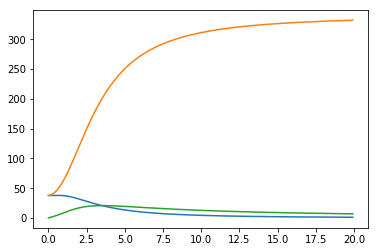

In [3]:
plt.plot(df_cond["t"],df_cond["f"])
plt.plot(df_cond["t"],df_cond["g"])
plt.plot(df_cond["t"],df_cond["h"])
plt.show()

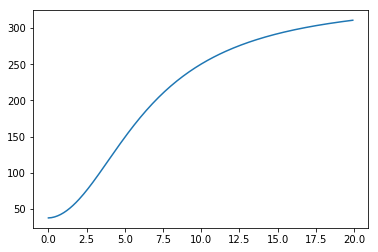

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from decimal import Decimal
from scipy.integrate import quad
from scipy.integrate import dblquad
import pandas as pd
def sigmazz(x,y,t):
    return ((((2*(15.0*t)**2 - 4*x**4 + 15.0*t*x**2*y)*2*15*t*y*x**2+((15*t)**2-4*x**4)**2* np.log(np.abs(2*x**2+15*t*y)))/(15*t)**3)*0.25/np.cosh((x-5)/2)**2)
def sigzz(y,t):
    return quad(sigmazz, -10, 20, args=(y,t))[0]
def XX(x,y,t):
    return 2*(1-y**2)*(x**4)*(15.0*t*y+2*x**2)*(1/((15.0*t*y+2*x**2)**2+(2*x*5*t)**2))*0.25/((np.cosh((x-5)/2)**2))
def sigmaxx(y,t):
    return quad(XX, -10.0, 20.0, args=(y,t))[0]
def sigxx(t):
    return quad(sigmaxx, -1.0, 1.0,args=(t))[0]
vec_sigxx=np.vectorize(sigxx)
vec_sigzz=np.vectorize(sigzz)
t=np.arange(0.01, 20.0, 0.1)
f1=vec_sigxx(t)
g1=vec_sigzz(1.00,t)-vec_sigzz(-1.00,t)
Cond1=np.column_stack((t,f1,g1))
df_sigma1=pd.DataFrame(Cond1)
df_sigma1.to_csv('sigma1.txt', sep='\t', index=False)
df_cond1 = pd.read_csv("sigma1.txt", sep="\t")
df_cond1.columns = ["t", "f1","g1"]
plt.plot(df_cond1["t"],df_cond1["g1"])
plt.show()

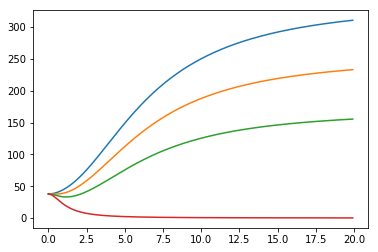

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.integrate import dblquad
import pandas as pd
df_cond1 = pd.read_csv("sigma1.txt", sep="\t")
df_cond1.columns = ["t", "f1","g1"]
z=0
rc=(np.cos(z))**2
rs=(np.sin(z))**2
df_cond1['D0']=(rc*df_cond1['g1']+rs*df_cond1['f1'])
del z
z=np.pi/6
rc=(np.cos(z))**2
rs=(np.sin(z))**2
df_cond1['D1']=(rc*df_cond1['g1']+rs*df_cond1['f1'])
del z
z=np.pi/4
rc=(np.cos(z))**2
rs=(np.sin(z))**2
df_cond1['D2']=(rc*df_cond1['g1']+rs*df_cond1['f1'])
del z
z=np.pi/2
rc=(np.cos(z))**2
rs=(np.sin(z))**2
df_cond1['D3']=(rc*df_cond1['g1']+rs*df_cond1['f1'])
#print(df_cond1)
plt.plot(df_cond1["t"],df_cond1["D0"])
plt.plot(df_cond1["t"],df_cond1["D1"])
plt.plot(df_cond1["t"],df_cond1["D2"])
plt.plot(df_cond1["t"],df_cond1["D3"])
plt.show()

In [5]:
def tri(x):
    return np.sin(x)
t=np.arange(0,2*np.pi,1)
vec=np.vectorize(tri)
s=(t,vec(t))
si=np.column_stack((s))
df_si=pd.DataFrame(si)
df_si.to_csv('si.txt', sep='\t', index=False)

In [6]:
df_si = pd.read_csv("si.txt", sep="\t")
df_si.columns = ["t", "win"]
z=np.pi/2
df_si['T0']=np.cos(z)*df_si['t']*df_si['win']
del z
z=np.pi
df_si['T1']=np.cos(z)*df_si['t']*df_si['win']
del z
z=0/2
df_si['T2']=np.cos(z)*df_si['t']*df_si['win']
print(df_si)

     t       win            T0        T1        T2
0  0.0  0.000000  0.000000e+00 -0.000000  0.000000
1  1.0  0.841471  5.152524e-17 -0.841471  0.841471
2  2.0  0.909297  1.113568e-16 -1.818595  1.818595
3  3.0  0.141120  2.592332e-17 -0.423360  0.423360
4  4.0 -0.756802 -1.853632e-16  3.027210 -3.027210
5  5.0 -0.958924 -2.935859e-16  4.794621 -4.794621
6  6.0 -0.279415 -1.026556e-16  1.676493 -1.676493


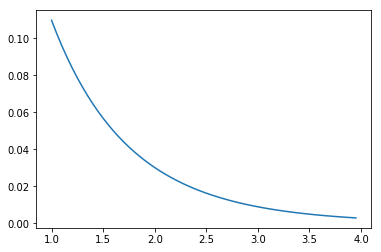

In [179]:
from scipy.integrate import quad
def integrand(t, n, x):
    return np.exp(-x*t) / t**n
def expint(n, x):
    return quad(integrand, 1, np.inf, args=(n, x))[0]
vec_expint = np.vectorize(expint)
u=np.arange(1.0, 4.0, 0.05)
l=vec_expint(3, u)
#print(l)
plt.plot(u,l)
plt.show()

In [8]:
y=[2,10]
z=[-1,100]
y1=pd.Series(y)
z1=pd.Series(z)
print(y1/z1)

0   -2.0
1    0.1
dtype: float64
